#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
# Loading data
data = pd.read_csv("training.csv")

In [13]:
data = pd.read_csv("training.csv", 
                   names=["Label", "Id", "Date", "Query", "Name", "Tweet"])

In [14]:
data.head()

,Label,Id,Date,Query,Name,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


#### Problem statement
- Tweet column has tweets of users.
- Label column contains 0 & 4. 0 represents negative comments & 4 represents postive comments.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Label   1600000 non-null  int64 
 1   Id      1600000 non-null  int64 
 2   Date    1600000 non-null  object
 3   Query   1600000 non-null  object
 4   Name    1600000 non-null  object
 5   Tweet   1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


- Data is unstructured, for better analysis we need to strucure the tweets, remove unwanted words, replace the abbrivation with full words. 

#### Converting html entities

In [16]:
#Importing html parser
from html.parser import HTMLParser
html_parser = HTMLParser()

In [17]:
data['clean_tweet'] = data['Tweet'].apply(lambda x: html_parser.unescape(x))
data.head()

,Label,Id,Date,Query,Name,Tweet,clean_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."


#### Removing "@user" from all the tweets

In [18]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [19]:
# remove twitter handles (@user)
data['clean_tweet'] = np.vectorize(remove_pattern)(data['clean_tweet'], "@[\w]*")
data.head(10)

,Label,Id,Date,Query,Name,Tweet,clean_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - Awww, that's a bum..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,"hey long time no see! Yes.. Rains a bit ,onl..."
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,que me muera ?


#### Changing all tweets into lowercase

In [20]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: x.lower())
data.head(10)

,Label,Id,Date,Query,Name,Tweet,clean_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - awww, that's a bum..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball. managed to s...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,"hey long time no see! yes.. rains a bit ,onl..."
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,que me muera ?


#### Apostrophe Lookup

In [21]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict

{"ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [22]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [23]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))
data.head(10)

,Label,Id,Date,Query,Name,Tweet,clean_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - awww, that has / t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball. managed to s...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it has / it is not behaving at all. I am ..."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,"hey long time no see! yes.. rains a bit ,onl..."
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,nope they did not have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,que me muera ?


#### Short word lookup

In [24]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [25]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: lookup_dict(x,short_word_dict))
data.head(10)

,Label,Id,Date,Query,Name,Tweet,clean_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - awww, that has / t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball. managed to s...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it has / it is not behaving at all. I am ..."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,"hey long time no see! yes.. rains a bit ,onl..."
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,nope they did not have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,que me muera ?


#### Emoticon Lookup

In [26]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}
emoticon_dict

{':)': 'happy',
 ':‑)': 'happy',
 ':-]': 'happy',
 ':-3': 'happy',
 ':->': 'happy',
 '8-)': 'happy',
 ':-}': 'happy',
 ':o)': 'happy',
 ':c)': 'happy',
 ':^)': 'happy',
 '=]': 'happy',
 '=)': 'happy',
 '<3': 'happy',
 ':-(': 'sad',
 ':(': 'sad',
 ':c': 'sad',
 ':<': 'sad',
 ':[': 'sad',
 '>:[': 'sad',
 ':{': 'sad',
 '>:(': 'sad',
 ':-c': 'sad',
 ':-< ': 'sad',
 ':-[': 'sad',
 ':-||': 'sad'}

In [27]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: lookup_dict(x,emoticon_dict))
data.head(10)

,Label,Id,Date,Query,Name,Tweet,clean_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - awww, that has / t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball. managed to s...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it has / it is not behaving at all. I am ..."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,"hey long time no see! yes.. rains a bit ,onl..."
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,nope they did not have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,que me muera ?


#### Replacing punctuations with space

In [28]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
data.head(10)

,Label,Id,Date,Query,Name,Tweet,clean_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",http twitpic com 2y1zl awww that has t...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to s...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no it has it is not behaving at all I am ...
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time no see yes rains a bit onl...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,nope they did not have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,que me muera


#### Replacing Special Characters with space

In [29]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
data.head(10)

,Label,Id,Date,Query,Name,Tweet,clean_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",http twitpic com 2y1zl awww that has t...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to s...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no it has it is not behaving at all I am ...
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time no see yes rains a bit onl...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,nope they did not have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,que me muera


#### Replacing number with space

In [30]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
data.head(10)

,Label,Id,Date,Query,Name,Tweet,clean_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",http twitpic com y zl awww that has t...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to s...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no it has it is not behaving at all I am ...
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time no see yes rains a bit onl...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,nope they did not have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,que me muera


#### Removing word whose length is 1

In [31]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
data['clean_tweet'][0:5]

0    http twitpic com zl awww that has that is bumm...
1    is upset that he cannot update his facebook by...
2    dived many times for the ball managed to save ...
3       my whole body feels itchy and like its on fire
4    no it has it is not behaving at all am mad why...
Name: clean_tweet, dtype: object

#### Spelling Correction - With TextBlob Library

In [32]:
from textblob import TextBlob

In [33]:
# Spelling correction is a cool feature which TextBlob offers, we can be accessed using the correct function as shown below.
blob = TextBlob("Why are you stting on this bech??") # Scentence with two errors
print(blob.correct()) # Correct function give us the best possible word simmilar to "gret"

Why are you sitting on this bench??


In [35]:
# we can see all the similar matches our first error along with the probability score.
import nltk
nltk.download('punkt')
blob.words[3].spellcheck()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


[('sitting', 0.8078078078078078),
 ('setting', 0.11411411411411411),
 ('string', 0.036036036036036036),
 ('sting', 0.02702702702702703),
 ('stating', 0.015015015015015015)]

#### Applying textlob to our dataset - Spelling correction

In [36]:
# Not cleaning the just showing the spelling check as its take lot of time to process all these tweets
## Shown sample how its must done
text = data['clean_tweet'][0:10].apply(lambda x: str(TextBlob(x).correct()))
text

0    http twitpic com ll www that has that is summe...
1    is upset that he cannot update his facebook by...
2    dived many times for the ball managed to save ...
3       my whole body feels itchy and like its on fire
4    no it has it is not behaving at all am mad why...
5                                   not the whole crew
6                                             need hug
7    hey long time no see yes rains bit only bit la...
8                            hope they did not have it
9                                          que me mere
Name: clean_tweet, dtype: object

In [37]:
# Importing stop words from NLTK coupus and word tokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [38]:
# Creating token for the clean tweets
data['tweet_token'] = data['clean_tweet'].apply(lambda x: word_tokenize(x))

## Fully formated tweets & there tokens
data.head(10)

,Label,Id,Date,Query,Name,Tweet,clean_tweet,tweet_token
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",http twitpic com zl awww that has that is bumm...,"[http, twitpic, com, zl, awww, that, has, that..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...,"[is, upset, that, he, can, not, update, his, f..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times for the ball managed to save ...,"[dived, many, times, for, the, ball, managed, ..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no it has it is not behaving at all am mad why...,"[no, it, has, it, is, not, behaving, at, all, ..."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew,"[not, the, whole, crew]"
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,need hug,"[need, hug]"
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time no see yes rains bit only bit la...,"[hey, long, time, no, see, yes, rains, bit, on..."
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,nope they did not have it,"[nope, they, did, not, have, it]"
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,que me muera,"[que, me, muera]"


In [39]:
# Importing stop words from NLTK corpus for english language
stop_words = set(stopwords.words('english'))
stop_words


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [40]:
# Created new columns of tokens - where stop words are being removed
data['tweet_token_filtered'] = data['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])

## Tokens columns with stop words and without stop words
data[['tweet_token', 'tweet_token_filtered']].head(10)

,tweet_token,tweet_token_filtered
0,"[http, twitpic, com, zl, awww, that, has, that...","[http, twitpic, com, zl, awww, bummer, shoulda..."
1,"[is, upset, that, he, can, not, update, his, f...","[upset, update, facebook, texting, might, cry,..."
2,"[dived, many, times, for, the, ball, managed, ...","[dived, many, times, ball, managed, save, rest..."
3,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]"
4,"[no, it, has, it, is, not, behaving, at, all, ...","[behaving, mad, see]"
5,"[not, the, whole, crew]","[whole, crew]"
6,"[need, hug]","[need, hug]"
7,"[hey, long, time, no, see, yes, rains, bit, on...","[hey, long, time, see, yes, rains, bit, bit, l..."
8,"[nope, they, did, not, have, it]",[nope]
9,"[que, me, muera]","[que, muera]"


#### We will create 2 new columns

- One For Stemming
- Second For Lemmatization

The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

- Stemming - Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach.

In [41]:
# Importing library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [42]:
# Created one more columns tweet_stemmed it shows tweets' stemmed version
data['tweet_stemmed'] = data['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
data['tweet_stemmed'].head(10)

0    http twitpic com zl awww bummer shoulda got da...
1    upset updat facebook text might cri result sch...
2         dive mani time ball manag save rest go bound
3                      whole bodi feel itchi like fire
4                                        behav mad see
5                                           whole crew
6                                             need hug
7    hey long time see ye rain bit bit laugh loud f...
8                                                 nope
9                                            que muera
Name: tweet_stemmed, dtype: object

#### Lemmatization - Lemmatization is the process of converting a word to its base form.

In [43]:
# Importing library for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [53]:
# Created one more columns tweet_lemmatized it shows tweets' lemmatized version
nltk.download('wordnet')
data['tweet_lemmatized'] = data['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
data['tweet_lemmatized'].head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


0    http twitpic com zl awww bummer shoulda got da...
1    upset update facebook texting might cry result...
2      dived many time ball managed save rest go bound
3                      whole body feel itchy like fire
4                                     behaving mad see
5                                           whole crew
6                                             need hug
7    hey long time see yes rain bit bit laugh loud ...
8                                                 nope
9                                            que muera
Name: tweet_lemmatized, dtype: object

#### Now When Our Data Is Cleaned & Ready We Start Our Text Analysis

#### We will do our analysis on two columns i.e. "tweet_stemmed" & "tweet_lematized"¶



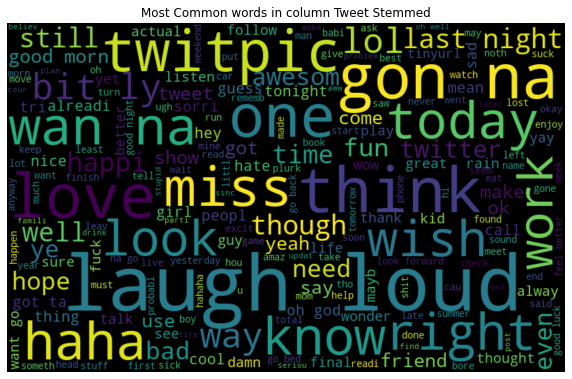

In [49]:
#visualizing all the words in column "tweet_stemmed" in our data using the wordcloud plot.
all_words = ' '.join([text for text in data['tweet_stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Stemmed")
plt.show()

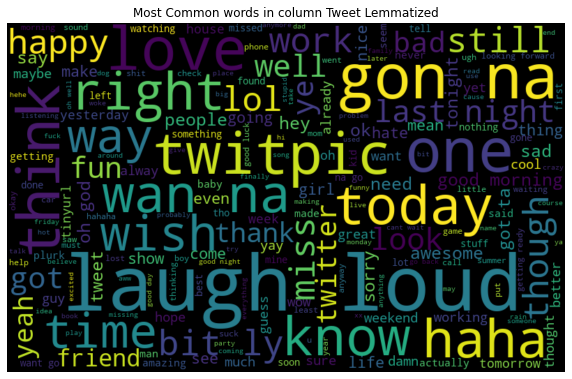

In [54]:
#Visualizing all the words in column "tweet_lemmatized" in our data using the wordcloud plot.
all_words = ' '.join([text for text in data['tweet_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmatized")
plt.show()

#### Most common Negative words 

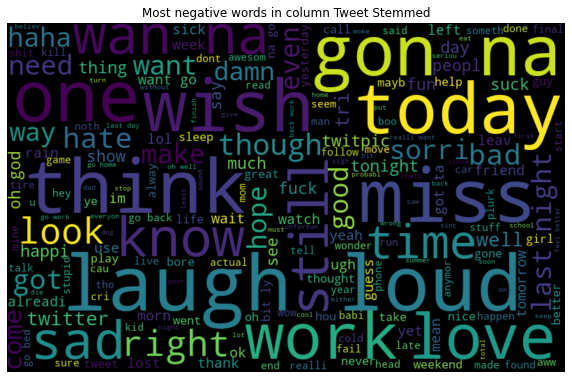

In [60]:
#Visualizing all the negative words in column "tweet_stemmed" in our data using the wordcloud plot.
negative_words =' '.join([text for text in data['tweet_stemmed'][data['Label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most negative words in column Tweet Stemmed")
plt.show()

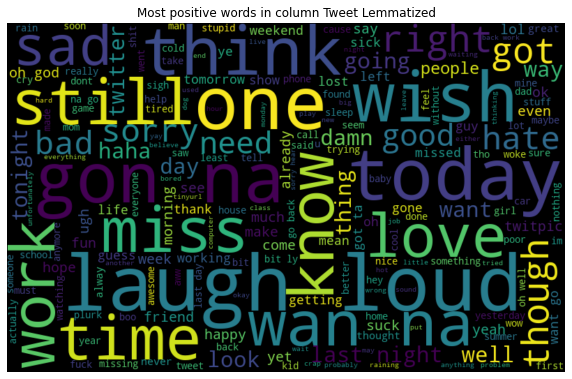

In [61]:
#Visualizing all the negative words in column "tweet_lemmatized" in our data using the wordcloud plot.
negative_words =' '.join([text for text in data['tweet_lemmatized'][data['Label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most positive words in column Tweet Lemmatized")
plt.show()

#### Most common positive words

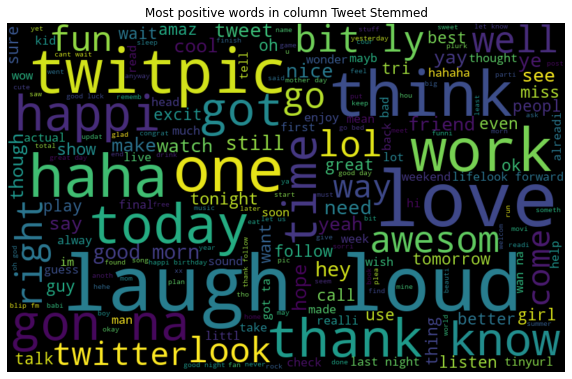

In [63]:
#Visualizing all the positive words in column "tweet_stemmed" in our data using the wordcloud plot.
positive_words =' '.join([text for text in data['tweet_stemmed'][data['Label'] == 4]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most positive words in column Tweet Stemmed")
plt.show()

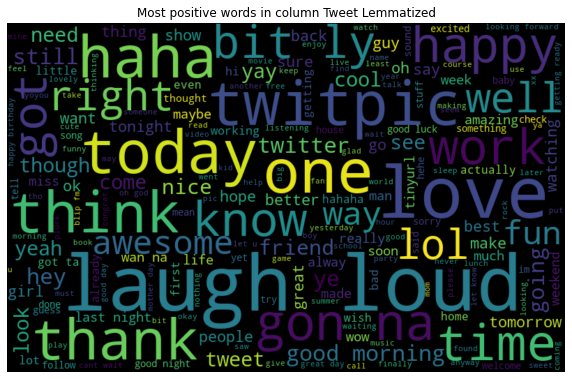

In [64]:
#Visualizing all the negative or racist/sexist words in column "tweet_lemmatized" in our data using the wordcloud plot.
positive_words =' '.join([text for text in data['tweet_lemmatized'][data['Label'] == 4]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most positive words in column Tweet Lemmatized")
plt.show()

#### Extracting Features from Cleaned Tweets

#### Bag-of-Words Features

In [65]:
# Importing library
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow_vectorizer

CountVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

#### Bag-Of-Words feature matrix - For columns "data['tweet_stemmed']"

In [66]:
bow_stem = bow_vectorizer.fit_transform(data['tweet_stemmed'])
bow_stem

<1600000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 6895590 stored elements in Compressed Sparse Row format>

#### Bag-Of-Words feature matrix - For column - data['tweet_lemmatized']

In [68]:
bow_lemm = bow_vectorizer.fit_transform(data['tweet_lemmatized'])
bow_lemm

<1600000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 6479984 stored elements in Compressed Sparse Row format>

#### TF-IDF Features

In [69]:
# Importing library
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_vectorizer

TfidfVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

#### TF-IDF feature matrix - For columns "data['tweet_stemmed']"

In [70]:
tfidf_stem = tfidf_vectorizer.fit_transform(data['tweet_stemmed'])
tfidf_stem

<1600000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 6895590 stored elements in Compressed Sparse Row format>

#### TF-IDF feature matrix - For columns "data['tweet_lemmatized']"

In [72]:
tfidf_lemm = tfidf_vectorizer.fit_transform(data['tweet_lemmatized'])
tfidf_lemm

<1600000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 6479984 stored elements in Compressed Sparse Row format>